In [2]:
# load data

import pandas as pd

blood_transfusion = pd.read_csv("blood_transfusion.csv")
data = blood_transfusion.drop(columns = "Class")
target = blood_transfusion["Class"]

In [3]:
# use support vector machine classifier (SVM)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = Pipeline(
    steps = [
        ("preprocessor", StandardScaler()),
        ("classifer", SVC())
    ]
)
model

Pipeline(steps=[('preprocessor', StandardScaler()), ('classifer', SVC())])

In [15]:
# perform ShuffleSplit cross-validation

from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state = 0)
cv_results = cross_validate(
    model,
    data,
    target,
    cv = cv,
    return_train_score = True,
    error_score = "raise",
)
cv_results = pd.DataFrame(cv_results)
train_score = pd.DataFrame()
test_score = pd.DataFrame()
train_score = cv_results["train_score"]
test_score = cv_results["test_score"]
print(f"The mean training accuracy is: {train_score.mean():.3f}")
print(f"The mean testing accuracy is: {test_score.mean():.3f}")

The mean training accuracy is: 0.790
The mean testing accuracy is: 0.765


In [20]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifer', 'preprocessor__copy', 'preprocessor__with_mean', 'preprocessor__with_std', 'classifer__C', 'classifer__break_ties', 'classifer__cache_size', 'classifer__class_weight', 'classifer__coef0', 'classifer__decision_function_shape', 'classifer__degree', 'classifer__gamma', 'classifer__kernel', 'classifer__max_iter', 'classifer__probability', 'classifer__random_state', 'classifer__shrinking', 'classifer__tol', 'classifer__verbose'])

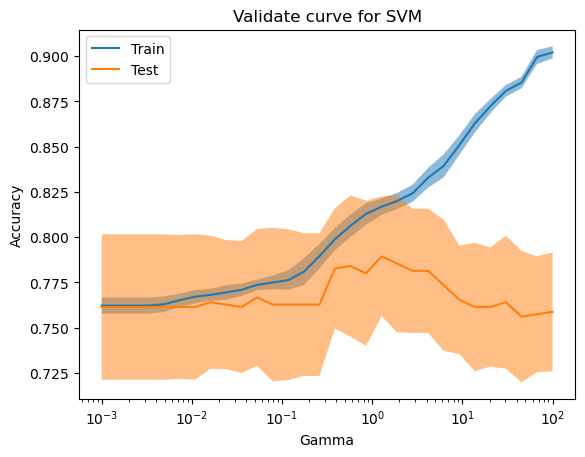

In [23]:
# evaluate effect of hyperparameter gamma on under/over fitting

import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

gamma = np.logspace(-3,2, num = 30)
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name = "classifer__gamma",
    param_range = gamma,
    cv = cv,
)
_ = disp.ax_.set(
    xlabel = "Gamma",
    ylabel = "Accuracy",
    title = "Validate curve for SVM",
)

Based on this graph, the ideal value for Gamma seems to be around $10^0$. After that value, the model seems to overfit as the test accuracy drops and the train accuracy rises dramatically. Before `gamma = 10^-1` the model seems to underfit with the training and testing errors being similar and the training error being relatively low. 

In [25]:
train_sizes = np.linspace(0.1, 1.0, num = 5, endpoint = True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

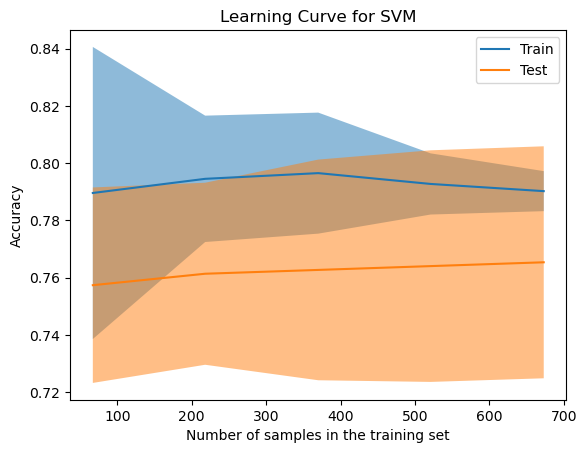

In [30]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    model,
    data, 
    target,
    train_sizes = train_sizes,
    cv = cv,
    score_type = "both", # both train and test errors
    score_name = "Accuracy",
)
_ = display.ax_.set(title = "Learning Curve for SVM")

From this graph, it does not seem that adding more samples improves the training or testing accuracy that much.